In [54]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [55]:
sns.set_theme(context='paper',style='darkgrid' , palette='Dark2' , rc = {'figure.figsize' : (5 , 5)})

In [56]:
df = pd.read_csv('Fifa_world_cup_matches.csv')

In [57]:
df.drop(['possession in contest'] , axis = 1 , inplace = True )

In [58]:
df = df[(df['team1'] == 'ARGENTINA') | (df['team2'] == 'ARGENTINA')]
df.reset_index(inplace = True , drop = True )

In [59]:
category = df['category']
category

0          Group C
1          Group C
2          Group C
3      Round of 16
4    Quarter-final
5       Semi-final
6            Final
Name: category, dtype: object

In [60]:
df

,team1,team2,possession team1,possession team2,number of goals team1,number of goals team2,date,hour,category,total attempts team1,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,ARGENTINA,SAUDI ARABIA,64%,24%,1,2,22 NOV 2022,11 : 00,Group C,14,...,1,0,4,14,0,0,65,80,163,361
1,ARGENTINA,MEXICO,50%,36%,2,0,26 NOV 2022,20 : 00,Group C,5,...,0,0,4,5,0,0,63,79,220,327
2,POLAND,ARGENTINA,24%,67%,0,2,30 NOV 2022,20 : 00,Group C,4,...,0,0,25,4,0,0,67,48,438,141
3,ARGENTINA,AUSTRALIA,53%,35%,2,1,03 DEC 2022,20 : 00,Round of 16,14,...,0,0,5,14,1,0,67,73,240,453
4,NETHERLANDS,ARGENTINA,45%,44%,2,2,09 DEC 2022,20 : 00,Quarter-final,5,...,0,1,15,5,0,0,91,79,401,323
5,ARGENTINA,CROATIA,34%,54%,3,0,13 DEC 2022,20 : 00,Semi-final,10,...,1,0,12,10,0,0,85,63,321,260
6,ARGENTINA,FRANCE,46%,40%,3,3,18 DEC 2022,16 : 00,Final,21,...,1,2,11,21,0,0,87,104,280,409


In [61]:
df.drop(['date', 'hour','category'] , axis = 1 , inplace = True )

In [62]:
for i in range(0 , df.shape[1] , 2):
    df.iloc[2 , i] , df.iloc[2 , i+1] = df.iloc[2 , i+1] , df.iloc[2 , i]

In [63]:
for i in range(0 , df.shape[1] , 2):
    df.iloc[4 , i] , df.iloc[4 , i+1] = df.iloc[4 , i+1] , df.iloc[4 , i]

In [64]:
df.drop([col for col in df.columns if (col not in ['team2' , 'number of goals team2'] and col[-1] == '2')] , axis = 1 , inplace = True )

In [65]:
df['category'] = category

In [66]:
df.columns

Index(['team1', 'team2', 'possession team1', 'number of goals team1',
       'number of goals team2', 'total attempts team1', 'conceded team1',
       'goal inside the penalty area team1',
       'goal outside the penalty area team1', 'assists team1',
       'on target attempts team1', 'off target attempts team1',
       'attempts inside the penalty area team1',
       'attempts outside the penalty area  team1', 'left channel team1',
       'left inside channel team1', 'central channel team1',
       'right inside channel team1', 'right channel team1',
       'total offers to receive team1', 'inbehind offers to receive team1',
       'inbetween offers to receive team1', 'infront offers to receive team1',
       'receptions between midfield and defensive lines team1',
       'attempted line breaks team1', 'completed line breaksteam1',
       'attempted defensive line breaks team1',
       'completed defensive line breaksteam1', 'yellow cards team1',
       'red cards team1', 'fouls agai

In [67]:
col_for_analysis = ['team1','team2',
 'possession team1',
 'number of goals team1','number of goals team2',
 'total attempts team1','goal inside the penalty area team1',
 'goal outside the penalty area team1',
 'assists team1',
 'on target attempts team1',
 'off target attempts team1',
 'attempts inside the penalty area team1',
 'attempts outside the penalty area  team1','yellow cards team1',
 'red cards team1',
 'fouls against team1',
 'offsides team1',
 'passes team1',
 'passes completed team1',
 'crosses team1',
 'crosses completed team1','corners team1',
 'free kicks team1',
 'penalties scored team1',
 'goal preventions team1',
 'own goals team1','category']

In [68]:
df = df[col_for_analysis]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   team1                                     7 non-null      object
 1   team2                                     7 non-null      object
 2   possession team1                          7 non-null      object
 3   number of goals team1                     7 non-null      int64 
 4   number of goals team2                     7 non-null      int64 
 5   total attempts team1                      7 non-null      int64 
 6   goal inside the penalty area team1        7 non-null      int64 
 7   goal outside the penalty area team1       7 non-null      int64 
 8   assists team1                             7 non-null      int64 
 9   on target attempts team1                  7 non-null      int64 
 10  off target attempts team1                 7 non-null  

In [70]:
df['possession team1'].unique()

array(['64%', '50%', '67%', '53%', '44%', '34%', '46%'], dtype=object)

In [71]:
df['possession team1'] = df['possession team1'].apply(lambda x : int(x.split('%')[0]))

In [72]:
df['possession team1'].dtype

dtype('int64')

In [73]:
df.columns

Index(['team1', 'team2', 'possession team1', 'number of goals team1',
       'number of goals team2', 'total attempts team1',
       'goal inside the penalty area team1',
       'goal outside the penalty area team1', 'assists team1',
       'on target attempts team1', 'off target attempts team1',
       'attempts inside the penalty area team1',
       'attempts outside the penalty area  team1', 'yellow cards team1',
       'red cards team1', 'fouls against team1', 'offsides team1',
       'passes team1', 'passes completed team1', 'crosses team1',
       'crosses completed team1', 'corners team1', 'free kicks team1',
       'penalties scored team1', 'goal preventions team1', 'own goals team1',
       'category'],
      dtype='object')

In [74]:
df['Match Status'] = [np.nan for i in range(df.shape[0])]

In [75]:
for i in range(df.shape[0]):
    if df['number of goals team1'].loc[i] > df['number of goals team2'].loc[i]:
        df['Match Status'].loc[i] = 'Won'
    
    elif df['number of goals team1'].loc[i] < df['number of goals team2'].loc[i]:
        df['Match Status'].loc[i] = 'Loss'
    
    else :
        df['Match Status'].loc[i] = 'Draw'

In [76]:
df.to_csv("ARGENTINA FIFA World Cup Qatar 2022.csv" , index=False)

## How many matches and win - draw - loss

In [77]:
df.shape[0]

7

In [78]:
df['Match Status'].value_counts()

Won     4
Draw    2
Loss    1
Name: Match Status, dtype: int64

<AxesSubplot:xlabel='Match Status', ylabel='count'>

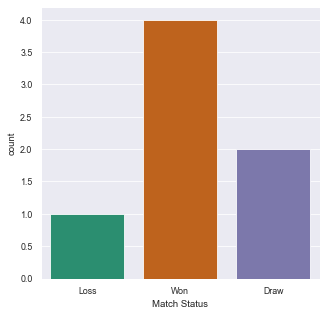

In [79]:
sns.countplot(df['Match Status'])

In [26]:
df[df['Match Status'] == 'Won']['team2'].to_frame()

,team2
1,MEXICO
2,POLAND
3,AUSTRALIA
5,CROATIA


In [27]:
df[df['Match Status'] == 'Draw']['team2'].to_frame()

,team2
4,NETHERLANDS
6,FRANCE


In [28]:
df[df['Match Status'] == 'Loss']['team2'].to_frame()

,team2
0,SAUDI ARABIA


## scored goals

In [29]:
df['number of goals team1'].sum()

15

### goal inside the penalty area

In [30]:
df['goal inside the penalty area team1'].sum()

14

### goal outside the penalty area

In [31]:
df['goal outside the penalty area team1'].sum()

1

### recieved goals 

In [32]:
df['number of goals team2'].sum()

8

### clean sheet 

In [33]:
df[df['number of goals team2'] == 0].shape[0]

3

### avreage scored for match 

In [34]:
df['number of goals team1'].mean()

2.142857142857143

### possession over matches 

In [35]:
df[['team2' , 'possession team1']]

,team2,possession team1
0,SAUDI ARABIA,64
1,MEXICO,50
2,POLAND,67
3,AUSTRALIA,53
4,NETHERLANDS,44
5,CROATIA,34
6,FRANCE,46


In [36]:
group = df.groupby(['team2'])['possession team1'].sum().to_frame().sort_values(by = 'possession team1' , ascending = False )
group

,possession team1
team2,
POLAND,67
SAUDI ARABIA,64
AUSTRALIA,53
MEXICO,50
FRANCE,46
NETHERLANDS,44
CROATIA,34


<AxesSubplot:xlabel='possession team1', ylabel='team2'>

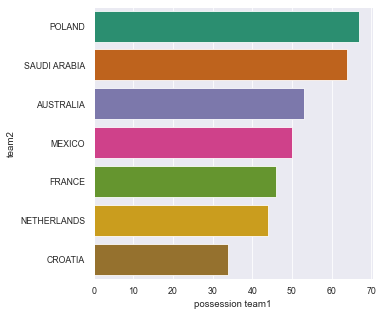

In [37]:
sns.barplot(data = df , y = 'team2' , x = 'possession team1' , estimator=np.sum , order=group.index)

### total attempt 

<AxesSubplot:xlabel='total attempts team1', ylabel='team2'>

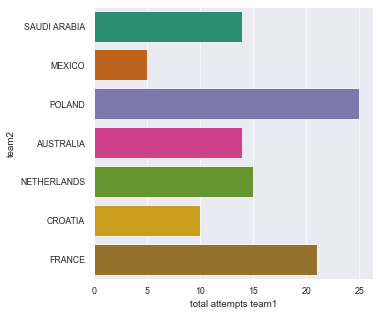

In [38]:
sns.barplot(data = df , y = 'team2' , x = 'total attempts team1' , estimator=np.sum)

### on target attempts	

<AxesSubplot:xlabel='on target attempts team1', ylabel='team2'>

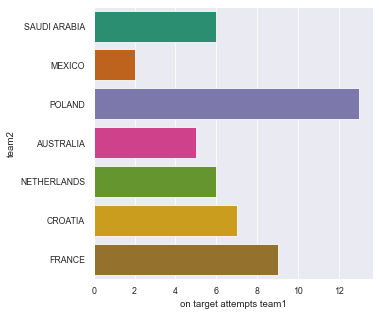

In [39]:
sns.barplot(data = df , y = 'team2' , x = 'on target attempts team1' , estimator=np.sum)

### off target attempts

<AxesSubplot:xlabel='off target attempts team1', ylabel='team2'>

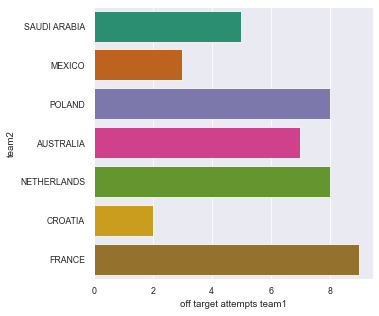

In [40]:
sns.barplot(data = df , x = 'off target attempts team1' , y = 'team2' , estimator=np.sum)

### attempts inside the penalty area

In [41]:
df['attempts inside the penalty area team1'].sum()

66

In [42]:
df['attempts inside the penalty area team1'].mean()

9.428571428571429

<AxesSubplot:xlabel='attempts inside the penalty area team1', ylabel='team2'>

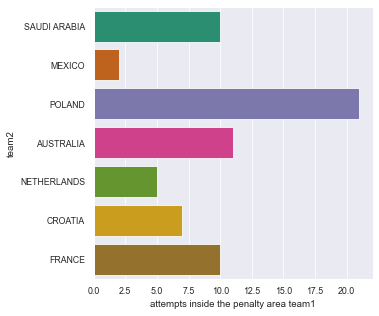

In [43]:
sns.barplot(data = df , y  = 'team2' , x = 'attempts inside the penalty area team1' , estimator=np.sum)

In [44]:
df.columns

Index(['team1', 'team2', 'possession team1', 'number of goals team1',
       'number of goals team2', 'total attempts team1',
       'goal inside the penalty area team1',
       'goal outside the penalty area team1', 'assists team1',
       'on target attempts team1', 'off target attempts team1',
       'attempts inside the penalty area team1',
       'attempts outside the penalty area  team1', 'yellow cards team1',
       'red cards team1', 'fouls against team1', 'offsides team1',
       'passes team1', 'passes completed team1', 'crosses team1',
       'crosses completed team1', 'corners team1', 'free kicks team1',
       'penalties scored team1', 'goal preventions team1', 'own goals team1',
       'category', 'Match Status'],
      dtype='object')

In [45]:
df['yellow cards team1'].sum()

16

In [46]:
df['red cards team1'].sum()

0

In [47]:
df['passes team1'].sum()

4375

In [48]:
df['passes completed team1'].sum()

3841

In [49]:
df['passes completed team1'].sum() / df['passes team1'].sum() *100

87.7942857142857

In [50]:
df['crosses team1'].sum()

115

In [51]:
df['crosses completed team1'].sum()

30

In [52]:
df['penalties scored team1'].sum()

4

In [53]:
df['corners team1'].sum()

39